In [4]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt

In [5]:
df_raw = pd.read_csv('bid_data2.0.csv')


df_raw.drop(['Unnamed: 0','City','Project Type','Estimator','Project Name'],axis = 1,inplace =True)
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245 entries, 0 to 2244
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Local        2245 non-null   object
 1   Bid Type     2245 non-null   object
 2   Design Type  2245 non-null   object
 3   DEPT         2245 non-null   object
 4    Base Bid    2245 non-null   int64 
 5   Bid Status   2245 non-null   object
dtypes: int64(1), object(5)
memory usage: 105.4+ KB


In [6]:
df_raw["EST"] = df_raw.DEPT.map( lambda x: 1.0 if x==' Est. ' else 0.0 )
df_raw["PM"] = df_raw.DEPT.map( lambda x: 1.0 if x==' P.M. ' else 0.0 )
# df_raw["SP"] = df_raw.DEPT.map( lambda x: 1.0 if x==' S.P. ' else 0.0 )

df_raw.drop(['DEPT'], axis = 1, inplace = True)

In [7]:
# df_raw.Local.unique()

In [8]:
df_raw["OC"] = df_raw.Local.map( lambda x: 1.0 if x==' 441 OC ' else 0.0 )
# df_raw["LA"] = df_raw.Local.map( lambda x: 1.0 if x== ' 11 LA ' else 0.0 )
# df_raw["NonOC/LA"] = df_raw.Local.map( lambda x: 1.0 if ((x==' 440 RS ') or  (x==' 477 SB ') or (x==' 401 Reno '))  else 0.0 )

df_raw.drop(['Local'], axis = 1, inplace = True)

In [9]:
df_raw['Design Type'].unique()

array([' Engineered ', ' Design/Build ', ' Design/ Assist '], dtype=object)

In [10]:
# df_raw["Select"] = df_raw['Bid Type'].map( lambda x: 1.0 if x==' Select Bid List 'else 0.0 )
df_raw["Budget"] = df_raw['Bid Type'].map( lambda x: 1.0 if x==' Budget 'else 0.0 )
df_raw["Competitive"] = df_raw['Bid Type'].map( lambda x: 1.0 if x==' Competitive 'else 0.0 )
df_raw["Negotiated"] = df_raw['Bid Type'].map( lambda x: 1.0 if x==' Negotiated 'else 0.0 )
df_raw.drop(['Bid Type'], axis = 1, inplace = True)

In [11]:
df_raw["D/A"] = df_raw['Design Type'].map( lambda x: 1.0 if x==' Design/ Assist ' else 0.0 )
df_raw["D/B"] = df_raw['Design Type'].map( lambda x: 1.0 if x==' Design/Build ' else 0.0 )
# df_raw["Engine"] = df_raw['Design Type'].map( lambda x: 1.0 if x==' Engineered ' else 0.0 )
df_raw.drop(['Design Type'], axis = 1, inplace = True)

In [12]:
stats =df_raw[' Base Bid '].describe()
# df_raw["25% Bid"] = df_raw[' Base Bid '].map( lambda x: 1.0 if x<stats[4] else 0.0 )
df_raw["50% Bid"] = df_raw[' Base Bid '].map( lambda x: 1.0 if (x>=stats[4]) and (x<stats[5]) else 0.0 )
df_raw["75% Bid"] = df_raw[' Base Bid '].map( lambda x: 1.0 if (x>=stats[5]) and (x<stats[6]) else 0.0 )
df_raw["Big Bid"] = df_raw[' Base Bid '].map( lambda x: 1.0 if (x>=stats[6]) else 0.0 )
df_raw.drop([' Base Bid '], axis = 1, inplace = True)

In [13]:
df_raw["Bid Status"].unique()


array(['Awarded', 'Lost'], dtype=object)

In [15]:
df_raw["Bid Status"] = df_raw['Bid Status'].map( lambda x: 1.0 if x=='Awarded' else 0.0 )
df_raw.head()

,Bid Status,EST,PM,OC,Budget,Competitive,Negotiated,D/A,D/B,50% Bid,75% Bid,Big Bid
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [132]:
ProfileReport(df_raw, title='featurized ', html={'style':{'full_width':True}})
# pro.to_file('bid_profile.html')

In [133]:
df_raw.groupby(['D/B','Big Bid','Bid Status']).count()

EST   PM   OC  Budget  Competitive  Negotiated  D/A  \
D/B Big Bid Bid Status                                                        
0.0 0.0     0.0         303  303  303     303          303         303  303   
            1.0         294  294  294     294          294         294  294   
    1.0     0.0         321  321  321     321          321         321  321   
            1.0         124  124  124     124          124         124  124   
1.0 0.0     0.0         429  429  429     429          429         429  429   
            1.0         657  657  657     657          657         657  657   
    1.0     0.0          92   92   92      92           92          92   92   
            1.0          25   25   25      25           25          25   25   

                        50% Bid  75% Bid  
D/B Big Bid Bid Status                    
0.0 0.0     0.0             303      303  
            1.0             294      294  
    1.0     0.0             321      321  
            1.0             124      124  
1.0 0.0     0.0             429      429  
            1.0             657      657  
    1.0     0.0              92       92  
            1.0              25       25

In [14]:
df_raw.groupby(['50% Bid','Bid Status']).count()

EST   PM   OC  Budget  Competitive  Negotiated  D/A  D/B  \
50% Bid Bid Status                                                             
0.0     0.0         195  195  195     195          195         195  195  195   
        1.0         452  452  452     452          452         452  452  452   
1.0     0.0          25   25   25      25           25          25   25   25   
        1.0         190  190  190     190          190         190  190  190   

                    75% Bid  Big Bid  
50% Bid Bid Status                    
0.0     0.0             195      195  
        1.0             452      452  
1.0     0.0              25       25  
        1.0             190      190

In [15]:
df_raw.groupby(['75% Bid','Bid Status']).count()

EST   PM   OC  Budget  Competitive  Negotiated  D/A  D/B  \
75% Bid Bid Status                                                             
0.0     0.0         165  165  165     165          165         165  165  165   
        1.0         482  482  482     482          482         482  482  482   
1.0     0.0          55   55   55      55           55          55   55   55   
        1.0         160  160  160     160          160         160  160  160   

                    50% Bid  Big Bid  
75% Bid Bid Status                    
0.0     0.0             165      165  
        1.0             482      482  
1.0     0.0              55       55  
        1.0             160      160

In [16]:
df_raw.groupby(['Bid Status','Big Bid','EST']).count()

PM   OC  Budget  Competitive  Negotiated  D/A  D/B  \
Bid Status Big Bid EST                                                        
0.0        0.0     0.0   57   57      57           57          57   57   57   
                   1.0   39   39      39           39          39   39   39   
           1.0     0.0   19   19      19           19          19   19   19   
                   1.0  105  105     105          105         105  105  105   
1.0        0.0     0.0  503  503     503          503         503  503  503   
                   1.0   47   47      47           47          47   47   47   
           1.0     0.0   20   20      20           20          20   20   20   
                   1.0   72   72      72           72          72   72   72   

                        50% Bid  75% Bid  
Bid Status Big Bid EST                    
0.0        0.0     0.0       57       57  
                   1.0       39       39  
           1.0     0.0       19       19  
                   1.0      105      105  
1.0        0.0     0.0      503      503  
                   1.0       47       47  
           1.0     0.0       20       20  
                   1.0       72       72

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import balanced_accuracy_score, accuracy_score,accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import statsmodels.api as sm


from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
y = df_raw['Bid Status']
X = df_raw.drop(['Bid Status'],axis = 1)


In [19]:
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif["features"] = X.columns
vif

,VIF Factor,features
0,3.636426,EST
1,1.315544,PM
2,4.346105,OC
3,1.272673,Budget
4,1.601094,Competitive
5,1.302083,Negotiated
6,1.219534,D/A
7,2.760003,D/B
8,1.881127,50% Bid
9,2.143360,75% Bid


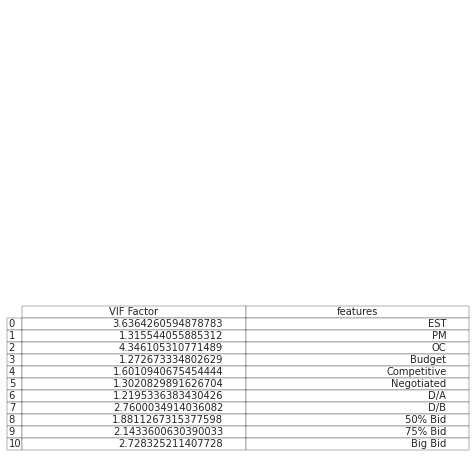

In [20]:
from pandas.plotting import table # EDIT: see deprecation warnings below

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, vif)  # where df is your data frame

plt.savefig('vif.png')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0

In [16]:
yhat = model.predict(X_test)
yhat

NameError: name 'model' is not defined

In [139]:

mse = mean_squared_error(y_test, yhat)
print(mse)
rmse = np.sqrt(mse)
print(rmse)


0.3612099644128114
0.6010074578678799


In [140]:
print(balanced_accuracy_score(y_test, yhat))


0.6404242908408466


In [141]:
accuracy_score(y_test, yhat)

0.6387900355871886

In [142]:
print(f1_score(y_test, yhat))
print(precision_score(y_test, yhat))
print(recall_score(y_test, yhat)) 

0.6469565217391303
0.6118421052631579
0.6863468634686347


In [143]:
probs = model.predict_proba(X_test)[:,1]

#adjust threshold?

In [144]:
confusion_matrix(y_test, yhat)


array([[173, 118],
       [ 85, 186]])

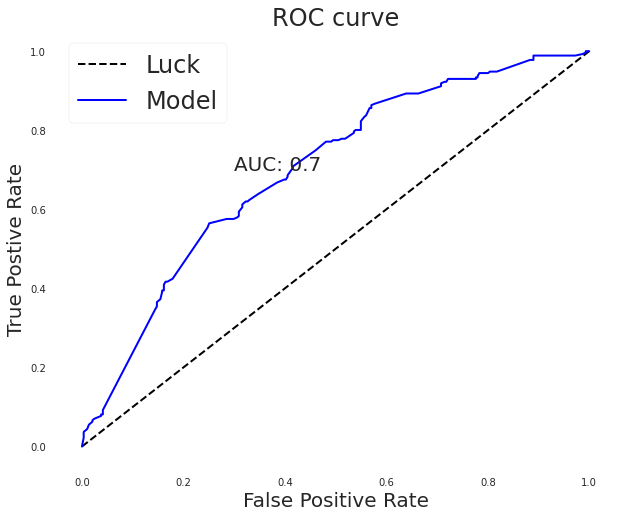

In [145]:
# COST BENEFIT?
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)
auc = metrics.roc_auc_score(y_test, probs)

# Plot the ROC
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck')
ax.plot(fpr, tpr, color='b', lw=2, label='Model')
ax.set_xlabel("False Positive Rate", fontsize=20)
ax.set_ylabel("True Postive Rate", fontsize=20)
ax.set_title("ROC curve", fontsize=24)
ax.text(0.3, 0.7, " ".join(["AUC:",str(auc.round(3))]), fontsize=20)
ax.legend(fontsize=24);

In [154]:
thresh = .3

y_hat = (probs >= thresh).astype(int)
print(f1_score(y_test, y_hat))
print(precision_score(y_test, y_hat))
print(recall_score(y_test, y_hat)) 
accuracy_score(y_test, y_hat)


0.6849315068493151
0.5446623093681917
0.922509225092251


0.5907473309608541

In [150]:
thresh = .40

y_hat = (probs >= thresh).astype(int)
print(f1_score(y_test, y_hat))
print(precision_score(y_test, y_hat))
print(recall_score(y_test, y_hat)) 
accuracy_score(y_test, y_hat)


0.6819571865443426
0.5822454308093995
0.8228782287822878


0.6298932384341637

In [155]:
confusion_matrix(y_test, y_hat)


array([[ 82, 209],
       [ 21, 250]])

In [157]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
est = SGDClassifier(max_iter =5000)
est.fit(X_train,y_train)
y_hat= est.predict(X_test)


y_hat


array([1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0.

In [158]:


print("LogisticRegression Coefficents: {}".format(model.coef_))
print("SGD Coefficents: {}".format(est.coef_))
X.columns

LogisticRegression Coefficents: [[-0.42556024  0.0788933   0.36136606 -0.92175782 -0.70275081  0.86665502
  -0.50447736 -0.24944085 -0.33932037 -0.61627825 -1.12074488]]
SGD Coefficents: [[-0.1394992  -0.2789984   0.41849759 -1.11599358 -0.83699519  0.97649439
  -0.97649439 -0.2789984  -1.39499198 -0.1394992  -1.95298877]]


Index(['EST', 'PM', 'OC', 'Budget', 'Competitive', 'Negotiated', 'D/A', 'D/B',
       '50% Bid', '75% Bid', 'Big Bid'],
      dtype='object')

In [159]:

print(f1_score(y_test, y_hat))
print(precision_score(y_test, y_hat))
print(recall_score(y_test, y_hat)) 
print(accuracy_score(y_test, y_hat))
confusion_matrix(y_test, y_hat)

0.5801801801801801
0.5669014084507042
0.5940959409594095
0.5854092526690391


array([[168, 123],
       [110, 161]])

In [160]:
from sklearn.model_selection import GridSearchCV

In [161]:
lin_reg_grid = {'C':[1,10,100,1000], 
                'solver' : ['newton-cg', 'liblinear', 'sag','saga'],
                'max_iter' : [2,5,10,100,500,1000]
                
               }
scoring = {'Accuracy': 'accuracy', 'F1': 'f1', 'Precision' :'precision', 'Recall':'recall'}

In [162]:
lin_reg_gridsearch = GridSearchCV(LogisticRegression(), lin_reg_grid, n_jobs = -1,scoring = 'accuracy')

In [163]:
lin_reg_gridsearch.fit(X_train, y_train)
param = lin_reg_gridsearch.best_params_

/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iter

/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the

/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iter

/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increa

/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/jrp/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.

In [164]:
print("Best parameters set found on development set:")
print()
print(lin_reg_gridsearch.best_params_)
print()
print("Grid scores on development set:")
print()
means = lin_reg_gridsearch.cv_results_['mean_test_score']
stds = lin_reg_gridsearch.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, lin_reg_gridsearch.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()


Best parameters set found on development set:

{'C': 100, 'max_iter': 2, 'solver': 'saga'}

Grid scores on development set:

0.649 (+/-0.036) for {'C': 1, 'max_iter': 2, 'solver': 'newton-cg'}
0.648 (+/-0.021) for {'C': 1, 'max_iter': 2, 'solver': 'liblinear'}
0.616 (+/-0.006) for {'C': 1, 'max_iter': 2, 'solver': 'sag'}
0.636 (+/-0.041) for {'C': 1, 'max_iter': 2, 'solver': 'saga'}
0.649 (+/-0.020) for {'C': 1, 'max_iter': 5, 'solver': 'newton-cg'}
0.649 (+/-0.019) for {'C': 1, 'max_iter': 5, 'solver': 'liblinear'}
0.636 (+/-0.045) for {'C': 1, 'max_iter': 5, 'solver': 'sag'}
0.651 (+/-0.023) for {'C': 1, 'max_iter': 5, 'solver': 'saga'}
0.650 (+/-0.025) for {'C': 1, 'max_iter': 10, 'solver': 'newton-cg'}
0.649 (+/-0.019) for {'C': 1, 'max_iter': 10, 'solver': 'liblinear'}
0.649 (+/-0.033) for {'C': 1, 'max_iter': 10, 'solver': 'sag'}
0.651 (+/-0.023) for {'C': 1, 'max_iter': 10, 'solver': 'saga'}
0.650 (+/-0.025) for {'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}
0.649 (+/-0.019) f

In [165]:
probs = lin_reg_gridsearch.predict_proba(X_test)[:,1]
thresh = .6
y_hat = (probs >= thresh).astype(int)
print(f1_score(y_test, y_hat))
print(precision_score(y_test, y_hat))
print(recall_score(y_test, y_hat)) 
print(accuracy_score(y_test, y_hat))
confusion_matrix(y_test, y_hat)

0.46300715990453456
0.6554054054054054
0.35793357933579334
0.599644128113879


array([[240,  51],
       [174,  97]])

In [166]:


print("LogisticRegression Coefficents: {}".format(lin_reg_gridsearch.best_estimator_.coef_))


LogisticRegression Coefficents: [[-0.48912364  0.21139994  0.64826164 -0.77174091 -0.75599703  0.75170764
  -0.5461998  -0.41187899 -0.94186629 -0.51236016 -1.11273265]]


In [167]:
len(lin_reg_gridsearch.best_estimator_.coef_[0])

11

In [168]:
len(X.columns)

11

In [169]:
dict(zip(X.columns,lin_reg_gridsearch.best_estimator_.coef_[0]))

{'EST': -0.4891236408057852,
 'PM': 0.21139994082148303,
 'OC': 0.6482616369479471,
 'Budget': -0.7717409075632741,
 'Competitive': -0.7559970303169536,
 'Negotiated': 0.751707637000997,
 'D/A': -0.5461997969902703,
 'D/B': -0.4118789925384372,
 '50% Bid': -0.941866291012705,
 '75% Bid': -0.5123601583477518,
 'Big Bid': -1.1127326518128826}